# D2-NET DEMO

In [2]:
# 1. Configurar entorno
!apt-get update -qq
!pip install torch torchvision h5py imageio imagesize matplotlib numpy scipy tqdm

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 795.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.3 MB/s eta 0:00:00
  Attempting

In [4]:
# 2. Clonar repositorio

!git clone https://github.com/mihaidusmanu/d2-net.git
%cd d2-net
!mkdir -p models
!wget https://dusmanu.com/files/d2-net/d2_tf.pth -O models/d2_tf.pth

Cloning into 'd2-net'...
remote: Enumerating objects: 223, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 223 (delta 51), reused 43 (delta 43), pack-reused 155 (from 1)
Receiving objects: 100% (223/223), 2.35 MiB | 5.62 MiB/s, done.
Resolving deltas: 100% (108/108), done.
/content/d2-net
--2025-06-07 17:25:44--  https://dusmanu.com/files/d2-net/d2_tf.pth
Resolving dusmanu.com (dusmanu.com)... 142.132.238.25
Connecting to dusmanu.com (dusmanu.com)|142.132.238.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30545768 (29M) [application/octet-stream]
Saving to: ‘models/d2_tf.pth’

models/d2_tf.pth    100%[===================>]  29.13M  13.2MB/s    in 2.2s    

2025-06-07 17:25:48 (13.2 MB/s) - ‘models/d2_tf.pth’ saved [30545768/30545768]



In [5]:
# 3. Subir imágenes

from google.colab import files
uploaded = files.upload()
for fn in uploaded:
  print("Cargado:", fn)
with open("images.txt","w") as f:
  for fn in uploaded:
    f.write("/content/d2-net/"+fn+"\n")

Saving 5.jpg to 5.jpg
Saving 1.jpg to 1.jpg
Cargado: 5.jpg
Cargado: 1.jpg


In [6]:
# 4. Extracción de caracteristicas
!python extract_features.py --image_list_file images.txt


/content/d2-net/extract_features.py:13: DeprecationWarning: scipy.misc is deprecated and will be removed in 2.0.0
  import scipy.misc
Namespace(image_list_file='images.txt', preprocessing='caffe', model_file='models/d2_tf.pth', max_edge=1600, max_sum_edges=2800, output_extension='.d2-net', output_type='npz', multiscale=False, use_relu=True)
  0% 0/2 [00:00<?, ?it/s]/content/d2-net/extract_features.py:87: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(path)
100% 2/2 [00:19<00:00,  9.84s/it]


In [11]:
# 5. Visualizar resultados de los puntos clave y el descriptor
import numpy as np, imageio, matplotlib.pyplot as plt

data_img1 = np.load('/content/d2-net/1.jpg.d2-net', allow_pickle=True)
data_img2 = np.load('/content/d2-net/5.jpg.d2-net', allow_pickle=True)

print(data_img1.files)  # ['keypoints', 'scores', 'descriptors']
print(data_img2.files)

print("Keypoints shape:", data_img1['keypoints'].shape)
print("Descriptors shape:", data_img1['descriptors'].shape)

print("Keypoints shape:", data_img2['keypoints'].shape)
print("Descriptors shape:", data_img2['descriptors'].shape)

['keypoints', 'scores', 'descriptors']
['keypoints', 'scores', 'descriptors']
Keypoints shape: (2811, 3)
Descriptors shape: (2811, 512)
Keypoints shape: (2117, 3)
Descriptors shape: (2117, 512)


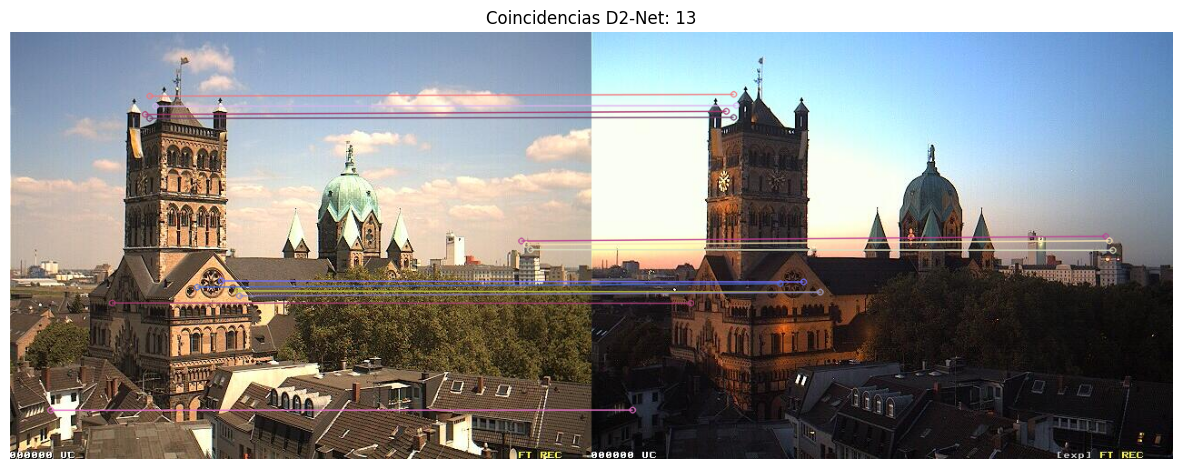

In [15]:
import cv2

kps1 = data_img1['keypoints'][:, :2]  # (x, y)
desc1 = data_img1['descriptors']

kps2 = data_img2['keypoints'][:, :2]
desc2 = data_img2['descriptors']

desc1 = desc1.astype(np.float32)
desc2 = desc2.astype(np.float32)

# Coincidencia usando FLANN
index_params = dict(algorithm=1, trees=5)  # FLANN con KD-Tree
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(desc1, desc2, k=2)

# Filtro de ratio test de Lowe
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Cargar imágenes
img1 = cv2.imread('/content/d2-net/1.jpg')
img2 = cv2.imread('/content/d2-net/5.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Dibujar coincidencias
matched_img = cv2.drawMatches(img1, [cv2.KeyPoint(x[0], x[1], 1) for x in kps1],
                              img2, [cv2.KeyPoint(x[0], x[1], 1) for x in kps2],
                              good_matches, None,
                              flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(15, 10))
plt.imshow(matched_img)
plt.title(f"Coincidencias D2-Net: {len(good_matches)}")
plt.axis('off')
plt.show()